In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [4]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.729


In [6]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
18/18 [==============================] - 1s 748us/step - loss: 0.7756 - accuracy: 0.4688
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 0.7294 - accuracy: 0.5122
Epoch 3/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5660
Epoch 4/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6302
Epoch 5/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6701
Epoch 6/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.7083
Epoch 7/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.7240
Epoch 8/50
18/18 [==============================] - 0s 976us/step - loss: 0.5727 - accuracy: 0.7483
Epoch 9/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5584 - accuracy: 0.7552
Epoch 10/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.7622
Epoch 11/50
18/

<AxesSubplot:ylabel='Density'>

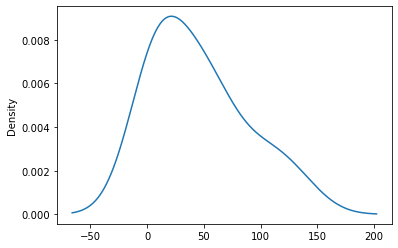

In [14]:
diabetes_df.Pregnancies.value_counts().plot.density()


<AxesSubplot:ylabel='Density'>

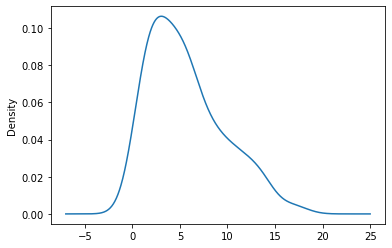

In [15]:
diabetes_df.Glucose.value_counts().plot.density()


<AxesSubplot:ylabel='Density'>

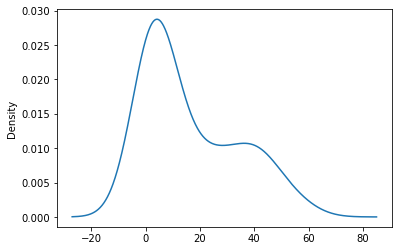

In [16]:
diabetes_df.BloodPressure.value_counts().plot.density()


<AxesSubplot:ylabel='Density'>

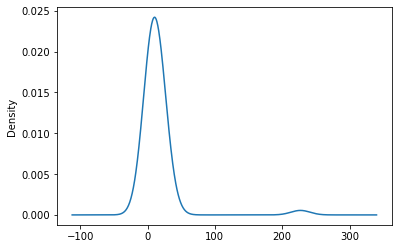

In [17]:
diabetes_df.SkinThickness.value_counts().plot.density()


<AxesSubplot:ylabel='Density'>

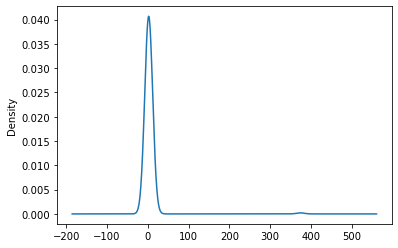

In [19]:
diabetes_df.Insulin.value_counts().plot.density()


<AxesSubplot:ylabel='Density'>

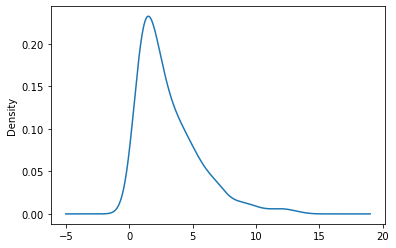

In [20]:
diabetes_df.BMI.value_counts().plot.density()


<AxesSubplot:ylabel='Density'>

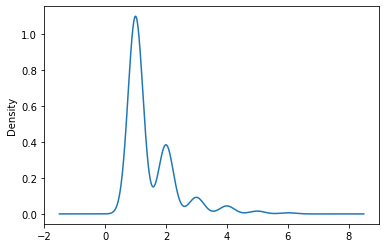

In [21]:
diabetes_df.DiabetesPedigreeFunction.value_counts().plot.density()


<AxesSubplot:ylabel='Density'>

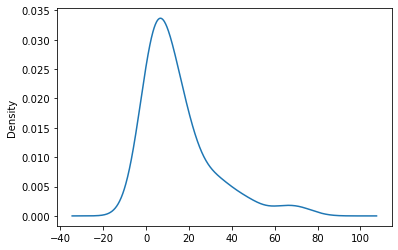

In [22]:
diabetes_df.Age.value_counts().plot.density()


<AxesSubplot:ylabel='Density'>

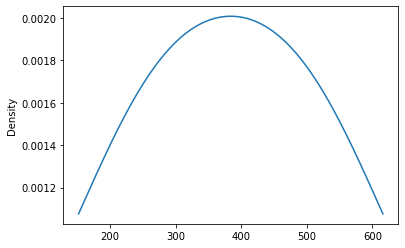

In [23]:
diabetes_df.Outcome.value_counts().plot.density()